<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Kaggle_eye_blinking_prediciton_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>WORK IN PROGRESS:</font> Final report: Kaggle eye blinking prediciton.**

In this report, I will point out the models and techniques I used to fit the traindata and with which I made accurate predictions during this course.

I will mainly explain 2 models, *Support Vector Machine* and the *K-nearest neighbors* in detail. Afterwards, I will mention technique using the *Voting Classifier* from sklearn. Lastly, I will provide a comparison between the predictions of the different estimators.

## Support Vector Machine (SVM) 
Model 1.

### **Loading data**

This is the first step. I load the trainset and the testset at the same time. Additionally, I save the data into understandable variables and I visualize it to have a first look. This first impression gives me the opportunity to get used to this data.   

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

In [47]:
print("Trainset: " + str(features.shape))
print("Testset: " + str(test_features.shape))
features.head()

Trainset: (2000, 14)
Testset: (12892, 14)


,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79


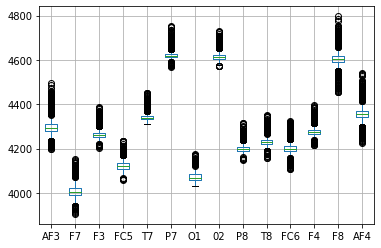

In [48]:
features.boxplot()

In [49]:
#How many measurements are there of the two classes?
print(trainset.label.value_counts())

#Are there missing values in some features?
print(features.isnull().sum()) 

0    1099
1     901
Name: label, dtype: int64
AF3    0
F7     0
F3     0
FC5    0
T7     0
P7     0
O1     0
02     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64


I can see from this that the ranges of the different features are not the same, so scaling will be appropriate to use if I want to perform predictions with SVM. Also, I now know that the trainset and testset indeed have 14 features and that the trainset is much smaller than the testset. 1099 instances of this trainset belong to class 0 (open eyes) and 901 instances belong to class 1 (eyes closed).  

### **Pre-processing**

Here, pre-processing the data is done through scaling the data. I don't change the features in any other way than scaling. However, I try different scaling methods. Here, I focussed on *Standerd scaling*, *MinMax scaling*, or *non-scaled* data.

I found information that scaling data around the mean should give the best performance for a SVM model, so I apply the *Standard scaler*. I will already transform the testset too, because this is easy readable this way and I don't have to think about it anymore. This step of transforming the testset doesn't necessarily need to be done here, because this is only needed just before performing predictions.

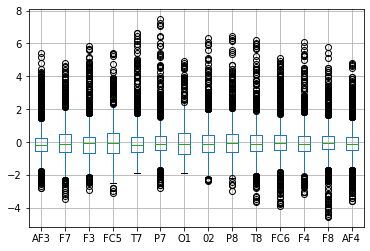

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

#Visualizing the scaled trainset features
features.boxplot()

From these boxplots, you can see that all features are now centered around the mean. I will work with these scaled features to find a useful SVM model.

###**Defining the model**

I have a choice between many models that are supported by Sklearn. One of these models is the *Support Vector Machine* model. This model is designed to solve two-class classification problems, which is exactly what we have in this project. With the specific *kernel functions* this model can compute not only linear decision boundaries, but also more complicated non-linear decision boundaries without explicitly having to map the features to new polynomial features. 

In [0]:
from sklearn.svm import SVC
model = SVC()

###**Model validation**

Now that I chose this model, I want to know how good the model performes on the trainset and even more, I actually want to know how good it performes on the testset. Unfortunately, I can not test the performance of the model on the testset, because a testset has no labels of course because this functions as unseen data. To estimate the evaluation the performance on the testset I use *Cross-validation* (CV).

In [52]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.897083809105548


As you can see, this is an AUC score of 89,71%, which means that the model with its default values is not a bad choice to use for this data.

I can check if *Standard scaling* realy is the best choice for this model and this dataset. I can use the same validation method and look at the AUC scores for the model fitted on *non-scaled* data and on *MinMax scaled* data.

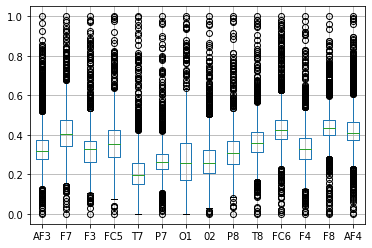

In [53]:
#MinMax scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

#Visualizing the scaled trainset features
features.boxplot()

In [54]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for MinMax scaled trainset: '+ str(score))

AUC score for MinMax scaled trainset: 0.8796913336261163


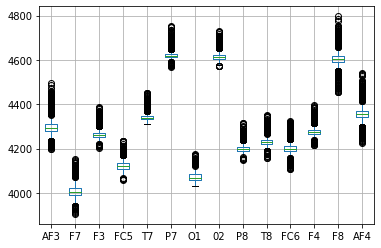

In [55]:
#Loading data again for non-scaled data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

features.boxplot()

In [56]:
#Non-scaled data
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for non-scaled trainset: '+ str(score))

AUC score for non-scaled trainset: 0.6246116966769141


These 3 AUC scores clearly show that *Standard scaler* is the best scaling method to transform the data in this case.

This is why I am going to scale this data again now, before going onto the next step:

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

###**Regularization**

The next step is highering the AUC score. This means I have to refine my model with better hyperparameters. I do this with *GridSearchCV*. This system has again the CV implemented, which makes this a good way to evaluate the hyperparameters.

In [58]:
#How do the parameters look like in this model?
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [16]:
from sklearn.model_selection import GridSearchCV

Cs = [1,10, 20, 50, 80, 100]
gammas = ['scale', 'auto',1, 0.01]

model = SVC(probability=True)
params = dict(C=Cs, gamma=gammas)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 1}
0.9632607963694919


I can try to refine the hyperparameter C even more:

In [59]:
from sklearn.model_selection import GridSearchCV

Cs = [4,5,6,7,8,9,10]

model = SVC(gamma=1, probability=True)
params = dict(C=Cs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=30)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 8}
0.9645392704532489


The model validation score seems to be the best score I can obtain with C = 8 and gamma =1. So, I deside to use the SVM model with these optimized parameter values.

In [60]:
#The SVM model with the best hyperparameter values
print(grid_search.best_estimator_)
print('AUC score for trainset: ' + str(grid_search.best_score_))

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
AUC score for trainset: 0.9645392704532489


###**Predictions**

As a last step in the process, I want to do predictions with my optimized model. Therefore, I first need to *fit* the model to the trainset, then make *predictions* and lastly I can save the predicted probabilities for the positive class into a *csv-file*.

In [61]:
#Define model
model = grid_search.best_estimator_

#Fit model
model.fit(features,trainset.label)

#Make predictions
predictions = model.predict_proba(test_features)[:,1]

results_SVM = pd.DataFrame({'index': testset['index'], 'label': predictions})
results_SVM.head()

,index,label
0,0,0.002502
1,1,0.367471
2,2,0.005207
3,3,0.999988
4,4,0.957799


In [0]:
filename = "my_prediction_results_SVM.csv"
results_SVM.to_csv(filename,index=False)

## K-nearest neighbors (KNN)
My second best model.

*K-nearest neighbors* has a totally different concept compared to *SVM*. *KNN* is a machine learning method that relies on supervised neighbors-based learning. Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

Source: [sklearn](https://scikit-learn.org/stable/modules/neighbors.html#classification)

###**Loading data**

In [0]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

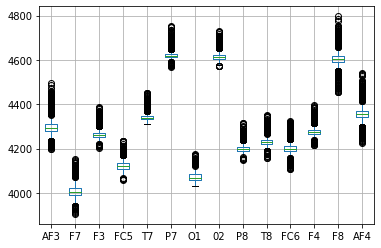

In [20]:
features.boxplot()

### **Pre-processing + Defining the model**

Here, I can do the same as pointed out for the SVM model. I can try different scaling methods, such as *non-scaled data*, *Standerd scaling*, or *MinMax scaling*. 
Afterwards I evaluate the performance of the *KNN* model on the different transformed features.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

#Score on non-scaled data
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9442850241545893


In [0]:
#Standard scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

In [23]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for Standard scaled trainset: '+ str(score))

AUC score for Standard scaled trainset: 0.9417285170546041


In [0]:
#MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

In [25]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for MinMax scaled trainset: '+ str(score))

AUC score for MinMax scaled trainset: 0.9430438076416339


These 3 scores suggest that *non-scaled* data would work best for fitting this model on the trainset. This is different compared to the *Standard scaled data* to be used in the SVM model.

To make the workflow of this notebook easy, I import the datasets once more, to be sure that the data is not scaled.

In [0]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

###**Regularization**

Again like SVM, a *KNN* model has some hyperparameters that can be set by myself in order to gain performance. I find new values with *GridSearchCV*.

In [27]:
#Which parameters?
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [28]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']
ps = [1,1.5,2,2.5,3]
leafs = [20,25,30,35,40]

params = dict(n_neighbors=neighbors, weights=weigh,p=ps, leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'leaf_size': 20, 'n_neighbors': 4, 'p': 2.5, 'weights': 'distance'}
0.9612608329673547


I can try to refine the *leaf_size* more, because this was at the lower border now of my search space for this parameter. Maybe the score betters when I choose an even lower value.

In [29]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(n_neighbors=4, p=2.5, weights='distance')

leafs = [1,3,5,10,20]

params = dict(leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 1}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


I can have a closer look at the results of this GridSearchCV:

In [30]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9613 (+/-0.0312) for {'leaf_size': 1}
0.9613 (+/-0.0312) for {'leaf_size': 3}
0.9613 (+/-0.0312) for {'leaf_size': 5}
0.9613 (+/-0.0312) for {'leaf_size': 10}
0.9613 (+/-0.0312) for {'leaf_size': 20}


These results suggest that the *leaf_size* doesn't realy matter that much for a better CV performance, once you choose a value smaller than 20. I choose to go further with leaf_size = 1.

###**Model validation**

According to these GridsearchCV results, I can conclude that the best optimized *KNN* model can be defined as follows, accompagnied with following AUC score:

In [31]:
print(grid_search.best_estimator_)
print('AUC score for trainset: ' + str(grid_search.best_score_))

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
AUC score for trainset: 0.9612608329673547


###**Predictions**

This last step is exactly the same as described above for the SVM model.

In [32]:
#Define model
model = grid_search.best_estimator_

#Fit model
model.fit(features,trainset.label)

#Make predictions
predictions = model.predict_proba(test_features)[:,1]

results_KNN = pd.DataFrame({'index': testset['index'], 'label': predictions})
results_KNN.head()

,index,label
0,0,0.000000
1,1,0.746633
2,2,0.000000
3,3,1.000000
4,4,1.000000


In [0]:
filename = "my_prediction_results_KNN.csv"
results_KNN.to_csv(filename,index=False)

##Extra: Voting Classifier

I've tried different models and tuned all their parameters. This was the time I had to go to a higher level.
With the *Voting classifier* I obtained my highest score in this Kaggle Competition. I will go through this process, providing less info compared to the *SVM* and *KNN* models, because this is extra. Nevertheless, I've included this in my report, because I've spent most of my time tuning this model and it is a realy interesting concept. 

Source: [sklearn](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)

###**Loading data**

In [0]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

###**Pre-processing**

In this case, the *Voting Classifier* needs other models (or estimators) to compile into an ensemble. The training happens on this ensemble of numerous models and it makes predictions based on their highest probability of chosen class as the output. This means that preprocessing more includes defining the various models to use in the ensemble.

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#4 classifiers
clf1 = make_pipeline(StandardScaler(), SVC(C=8, gamma=1, 
                                           probability=True))
clf2 = RandomForestClassifier(criterion='entropy', n_estimators=310, 
                              max_depth=27, random_state=0, 
                              bootstrap=False)
clf3 = XGBClassifier(n_estimators=900, gamma=0, max_depth=8, 
                     min_child_weight=0, learning_rate=0.1, 
                     colsample_bytree=0.9, subsample=0.6,
                     reg_alpha=1e-5)
clf4 = KNeighborsClassifier(algorithm='auto', leaf_size=1,
                            n_neighbors=4, p=2.5, weights='distance')

As you can see in the code cell above, I used 4 different models. clf1 and clf4 are represent my two best models I described above. Together with these two, I also include optimized *Random Forest* and *XGBoost* models.

###**Defining the model**

The *Voting Classifier* from sklearn is an ensemble method that aggregates the findings of each classifier passed into *Voting Classifier* and predicts the output class based on the highest majority of voting.

In [0]:
ensemble = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), 
                                    ('xgb', clf3), ('kkn', clf4)]
                          , voting='soft')

###**Model validation**

In [37]:
score = cross_val_score(ensemble, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9702285902503295


I can see that this score is already highter compared to the scores I obtained with the optimized *SVM* and *KKN* models.

For a better overview of the CV AUC scores ofall estimators and the ensemble model:

In [38]:
for clf, name in zip([clf1, clf2, clf3, clf4, ensemble], 
                      ['SVC', 'Random Forest', 'XGBoost', 'KNeighbors', 
                       'Ensemble']):
  scores = cross_val_score(clf, features, trainset.label, 
                           scoring='roc_auc', cv=20)
  print("AUC score: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), name))

AUC score: 0.96336 (+/- 0.01755) [SVC]
AUC score: 0.93702 (+/- 0.02890) [Random Forest]
AUC score: 0.94625 (+/- 0.02750) [XGBoost]
AUC score: 0.96126 (+/- 0.01561) [KNeighbors]
AUC score: 0.97023 (+/- 0.01751) [Ensemble]


I can try to refine this ensemble model by adding weights. I choose the best weights again with *GridSearchCV*. I can repeat this process a few times and afterwards evaluate what weights are best to implement in this ensemble.

In [39]:
params = {'weights':[[2,1,1,2],[3,1,2,3],[3,1,2,2]]}
grid_Search = GridSearchCV(param_grid = params, estimator=ensemble, 
                           scoring='roc_auc', cv=20)
grid_Search.fit(features, trainset.label)

print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'weights': [3, 1, 2, 3]}
0.9725115649246083


In [41]:
params = {'weights':[[3,1,2,3],[3,1,1,3],[4,1,2,3],[4,1,1,4]]}
grid_Search = GridSearchCV(param_grid = params, estimator=ensemble, 
                           scoring='roc_auc', cv=20)
grid_Search.fit(features, trainset.label)

print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'weights': [4, 1, 2, 3]}
0.9727133655394524


In [42]:
params = {'weights':[[4,1,2,3],[5,1,2,3],[5,1,2,4]]}
grid_Search = GridSearchCV(param_grid = params, estimator=ensemble, 
                           scoring='roc_auc', cv=20)
grid_Search.fit(features, trainset.label)

print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'weights': [4, 1, 2, 3]}
0.9727134387351777


In [43]:
params = {'weights':[[4,1,2,3],[4,1,1,3],[5,1,1,4],[5,1,1,3]]}
grid_Search = GridSearchCV(param_grid = params, estimator=ensemble, 
                           scoring='roc_auc', cv=20)
grid_Search.fit(features, trainset.label)
print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'weights': [4, 1, 1, 3]}
0.9727944664031621


I deside to go further with the weights that give me the best AUC score: [4, 1, 1, 3]

###**Predictions**

This score is actually the best score I could obtain in this competition. This means I'm going to make predictions and upload them on the Kaggle website. This step is the same as with the other two models.

In [44]:
#Define model
model = grid_search.best_estimator_

#Fit model
model.fit(features,trainset.label)

#Make predictions
predictions = model.predict_proba(test_features)[:,1]

results_VC = pd.DataFrame({'index': testset['index'], 'label': predictions})
results_VC.head()

,index,label
0,0,0.000000
1,1,0.746633
2,2,0.000000
3,3,1.000000
4,4,1.000000


In [0]:
filename = "my_prediction_results_VC.csv"
results_VC.to_csv(filename,index=False)

##Comparing the predictions

In this section I will provide a comparison between the results obtained by the *SVM*, *KNN* and *Voting Classifier*.